#### VGG for the Bird Classificaiton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
DIR_TRAIN = '../Data/Use/Train/'
DIR_VALID = '../Data/Use/Valid/'

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_datagen = train_datagen.flow_from_directory(DIR_TRAIN,
                                                target_size=(224,224), 
                                                color_mode='rgb', 
                                                class_mode='categorical', 
                                                batch_size=16,
                                                shuffle=True)

valid_datagen = valid_datagen.flow_from_directory(DIR_VALID,
                                                target_size=(224,224), 
                                                color_mode='rgb', 
                                                class_mode='categorical', 
                                                batch_size=16,
                                                shuffle=True)

Found 1000 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
class VGG_16_Net(tf.keras.Model):
    def __init__(self):
        super(VGG_16_Net, self).__init__()

        self.layer = [
            tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=10, activation='softmax'),
        ]

    def call(self, x):
        for layer in self.layer:
            x = layer(x)
        return x

In [7]:
net = VGG_16_Net()

net.build(input_shape=(16, 224, 224, 3))
net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = net.fit(train_datagen, epochs=10, validation_data=valid_datagen)

Epoch 1/10
63/63 [==============================] - 5s 76ms/step - loss: 1.2397 - accuracy: 0.8680 - val_loss: 8.5409 - val_accuracy: 0.3200
Epoch 2/10
63/63 [==============================] - 5s 76ms/step - loss: 0.9286 - accuracy: 0.8870 - val_loss: 1.4235 - val_accuracy: 0.8200
Epoch 3/10
63/63 [==============================] - 5s 75ms/step - loss: 0.7939 - accuracy: 0.8980 - val_loss: 3.7857 - val_accuracy: 0.6400
Epoch 4/10
63/63 [==============================] - 5s 75ms/step - loss: 0.5935 - accuracy: 0.9240 - val_loss: 1.9426 - val_accuracy: 0.7600
Epoch 5/10
63/63 [==============================] - 5s 76ms/step - loss: 0.2535 - accuracy: 0.9540 - val_loss: 2.2552 - val_accuracy: 0.7600
Epoch 6/10
63/63 [==============================] - 5s 76ms/step - loss: 0.2707 - accuracy: 0.9570 - val_loss: 4.4394 - val_accuracy: 0.6800
Epoch 7/10
63/63 [==============================] - 5s 75ms/step - loss: 0.3043 - accuracy: 0.9500 - val_loss: 2.8968 - val_accuracy: 0.7800
Epoch 8/10
63

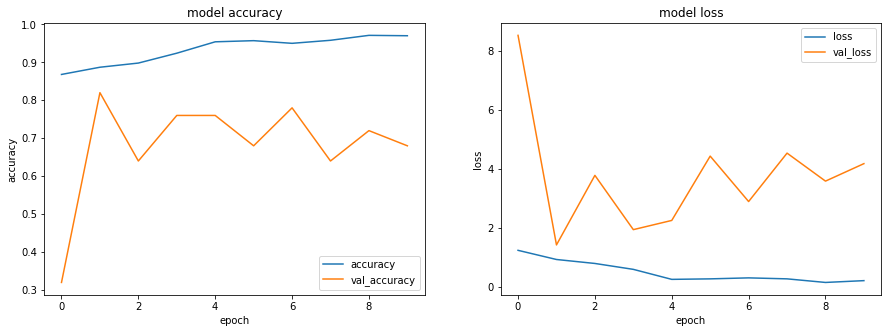

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()